In [1]:
#init

import numpy as np   #numpy lets us do nice vector manipulations
import glob          #access the file system (for searching for files)
import matplotlib.pyplot as plt          #for plotting
from scipy.signal import savgol_filter   #nice filter
import mpld3                             #toolbar for zooming in plots
mpld3.enable_notebook()

In [2]:
#import data

#Load data (all .ASC files in directory)
files=sorted(glob.glob("*.ASC"))

#Get x axis wavenumbers from a file
x = np.loadtxt(files[1], skiprows=25, unpack=True)[0]

n=len(files)            #number of files
m=len(x)             #data length of each spectrum
data=np.ndarray((n,m))  #create nxm array to hold all data

for i in range(n):
    data[i] = np.loadtxt(files[i], skiprows=25, unpack=True)[1]

In [3]:
#Smooth data

sdata=np.ndarray((n,m))   #another array to hold smoothed data

for i in range(n):
    sdata[i]=savgol_filter(data[i],37,3)

In [4]:
#Find peaks (in smoothed data)

peaks=[]

for i in sdata:
    peaks.append(np.argmax(i[3400:3600])+3400)    #find peak

In [5]:
#Normalize

nsdata=np.ndarray((n,m))

for i in range(n):
    tmp=sdata[i]-sdata[i][-1]  #subtract minimum
    nsdata[i]=tmp/tmp[peaks[i]]
    

Text(0.5, 0, 'Wavenumber [per cm]')

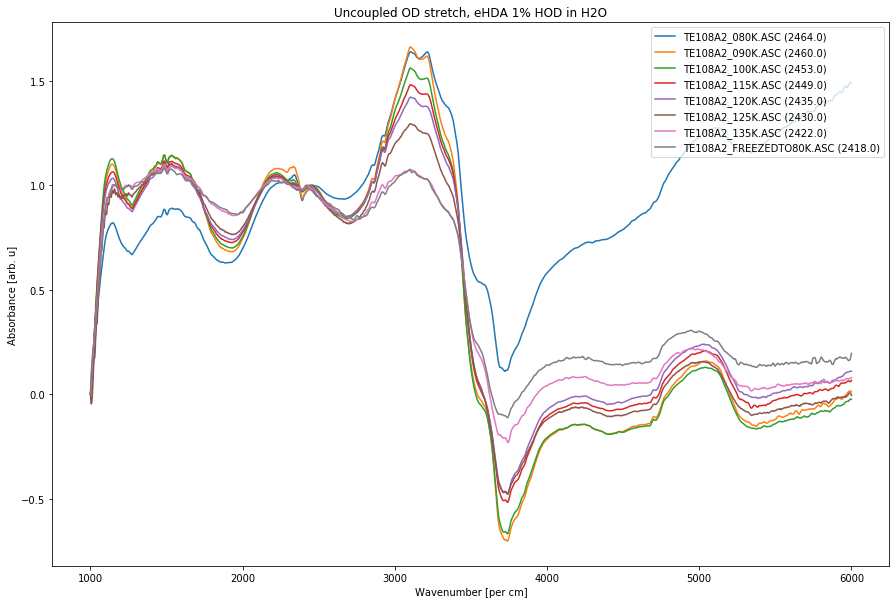

In [6]:
fig=plt.figure(figsize=(15,10))   #creates a figure and sets size

#include=[0,1,2,3,4,7,8,9]       #These spectra will be plotted

legend=[str(files[i])+' (' + str(x[peaks[i]])+')' for i in range(n)]   #Use filenames for legend   
#legend=['80 K', '10000 K', 'etc']   #custom legend

for i in range(n):
    plt.plot(x,nsdata[i], linestyle='-')

plt.legend(legend, loc='upper right')
plt.title('Uncoupled OD stretch, eHDA 1% HOD in H2O')
plt.ylabel('Absorbance [arb. u]')
plt.xlabel('Wavenumber [per cm]')